<br><p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold">Life Expectancy, Income and Sources <br> <br> of Environmental Degradation in Nigeria</p><br><br>


#  Life Expectancy, Income and Sources of Environmental Degradation in Nigeria
## Section 1: Exploring the World Development Indicators (WDI) Dataset
### First - import the relevant Python libraries 

*Note: Before answering the above question through analysis, it is important to acquire , explore and analyze the data so as to come up with verifiable findings. Thus, Section 1 acquires and prepares the data while section 2  analyzes the data.*


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Data Injestion 

dataset = pd.read_csv('./Worldbank_data/Indicators.csv')
dataset.shape

(5656458, 6)

Large dataset with 6 rows - what information can be derived from this dataset?

In [3]:
dataset.head(30)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


The data contains information on several developmental indicators , across countries/regions including years. **How many countries, years and indicators are there?**

In [4]:
# Number of countires in the dataset with unique name (CountryName)
countries = dataset['CountryName'].unique().tolist()
len(countries)

247

There are about 247 countries listed. **Are there also 247 unique county codes?**

In [5]:
# How many unique country codes are there ? (should be the same #)
countryCodes = dataset['CountryCode'].unique().tolist()
len(countryCodes)

247

Indeed there are 247 country codes - Good! **Now, what about the indicators - how many are they?**

In [6]:
indicators = dataset['IndicatorName'].unique().tolist()
len(indicators)

1344

Interesting! there are 1344 indicators. **How many years does these indicators cover and what range?**

In [7]:
# Number of years in the dataset
years = dataset['Year'].unique().tolist()
len(years)

56

In [8]:
# Range of years
print(min(years),"to", max(years))

1960 to 2015


Dataset is for 56 years - between 1960 to 2015

**Given the large number of indicators - it is time to pick country of interest (such as Nigeria) and explore:**
- the variants of environmental degradation (Sources of CO2 Emissions)
- life expectancy
- Income (Gross Domestic Product (GDP))


### Indicator 1: Environmental Degradation (CO2 emissions from liquid fuel consumption (% of Total ) for Nigeria

In [9]:
#  CO2 emissions from liquid sources for Nigeria


CO2_liquid = 'CO2 emissions from liquid fuel consumption \(%'
CO2_country = 'NGA'

mask1 = dataset['IndicatorName'].str.contains(CO2_liquid) 
mask2 = dataset['CountryCode'].str.contains(CO2_country)

stage1 = dataset[mask1 & mask2] # stage1 matches Nigeria with country code, CO2 emisssion from liquid sources (1960-2015)


In [10]:
stage1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16650,Nigeria,NGA,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1960,55.113025
42276,Nigeria,NGA,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1961,59.714795
70198,Nigeria,NGA,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1962,55.964912
98761,Nigeria,NGA,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1963,45.921864
127692,Nigeria,NGA,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1964,44.455645


In [11]:
stage1['Value'].describe()

count    52.000000
mean     45.003467
std      18.956058
min      15.517749
25%      31.672099
50%      42.204783
75%      55.325997
max      82.123884
Name: Value, dtype: float64

The descriptive statistics shows that:
    - average share CO2 emissions from liquid sources is about 45% in Nigeria with a median of 42% between 1960 - 2015
    - 82% and 16% represent the maximum and minimum shares of CO2 emissions from liquid sources in Nigeria
    

**How does CO2 Emissions from liquid sources change over time ?** 

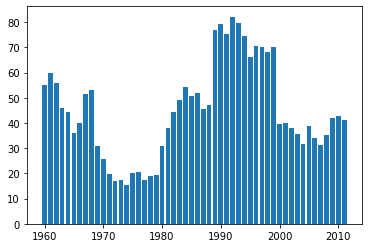

In [12]:
Years = stage1['Year'].values # Obtaining the years
CO2_1 = stage1['Value'].values # values of CO2 emissions from liquid sources

plt.bar(Years,CO2_1)
plt.show()

It could be infered that share CO2 emissions from liquid sources seem to flucttuate with its lowest and highest in 1975 and 1992 respectively. A further exploration of data using a line graph. 

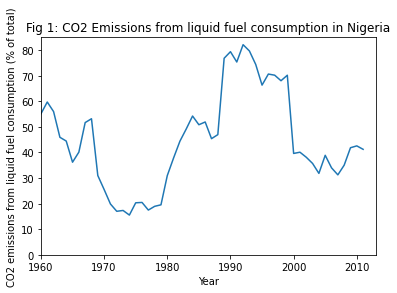

In [13]:
plt.plot(stage1['Year'].values, stage1['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage1['IndicatorName'].iloc[0])

#label the figure
plt.title('Fig 1: CO2 Emissions from liquid fuel consumption in Nigeria')

# to make more honest, start they y axis at 0
plt.axis([1960, 2013,0,85])


plt.show()

Indeed - CO2 emission from liquid fuel fluctuated between 1960 - 2011

### Indicator 2: Environmental Degradation (CO2 emissions from gaseous fuel consumption (% of Total ) for Nigeria


In [14]:
#  CO2 emissions from gaseous sources for Nigeria

CO2_gaseous = 'CO2 emissions from gaseous fuel consumption \(%'
CO2_country = 'NGA'

mask3 = dataset['IndicatorName'].str.contains(CO2_gaseous) 
mask4 = dataset['CountryCode'].str.contains(CO2_country)

stage2 = dataset[mask3 & mask4] # stage2 matches Nigeria with country code, CO2 emisssion from solid sources (1960-2015)


In [15]:
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16648,Nigeria,NGA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,0.000000
42274,Nigeria,NGA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1961,0.000000
70196,Nigeria,NGA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1962,0.000000
98759,Nigeria,NGA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1963,1.096642
127690,Nigeria,NGA,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1964,1.411290


In [16]:
stage2['Value'].describe()

count    52.000000
mean     11.624690
std       9.065034
min       0.000000
25%       2.055874
50%      12.651906
75%      18.890460
max      28.848981
Name: Value, dtype: float64

The descriptive statistics shows that:

- average share CO2 emissions from gaseous sources is about 11% in Nigeria with a median of 13% between 1960 - 2011
- 29% and 0.00% represent the maximum and minimum shares of CO2 emissions from gaseous sources in Nigeria

**How does CO2 Emissions from gaseous sources change over time ?** 

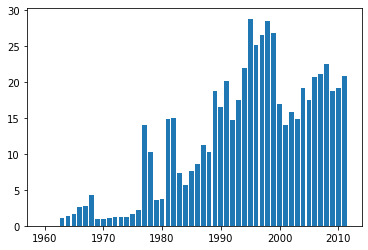

In [17]:
Years2 = stage2['Year'].values # Obtaining the years
CO2_2 = stage2['Value'].values # values of CO2 emissions from gaseous sources

plt.bar(Years,CO2_2)
plt.show()

Also, it could be infered here that that share CO2 emissions from gaseous sources seem to lowest and highest in 1970s and mid 1990s respectively. A further exploration of data using a line graph. 

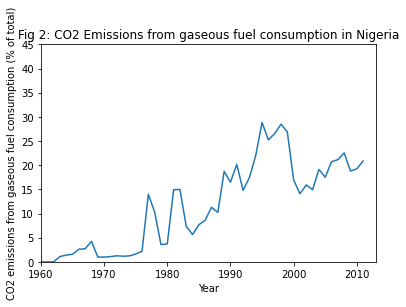

In [18]:
plt.plot(stage2['Year'].values, stage2['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage2['IndicatorName'].iloc[0])

#label the figure
plt.title('Fig 2: CO2 Emissions from gaseous fuel consumption in Nigeria')

# to make more honest, start they y axis at 0
plt.axis([1960, 2013,0,45])


plt.show()

Graphic now appear more presenatable and readable. 

### Indicator 3: Life expectancy at birth, total (years) -  Nigeria 


In [19]:
# Life expectancy at birth, total (years)

lifexp = 'Life expectancy at birth, total \(years'
CO2_country = 'NGA'

mask5= dataset['IndicatorName'].str.contains(lifexp) 
mask6 = dataset['CountryCode'].str.contains(CO2_country)

stage3 = dataset[mask5 & mask6] # stage2 matches Nigeria with country code, Life expectancy (1960-2015)


In [20]:
stage3.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16688,Nigeria,NGA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,37.182951
42317,Nigeria,NGA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,37.638268
70245,Nigeria,NGA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,38.079073
98809,Nigeria,NGA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,38.499854
127740,Nigeria,NGA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,38.899122


In [21]:
stage3['Value'].describe()

count    54.000000
mean     45.152523
std       3.837446
min      37.182951
25%      42.599598
50%      46.098610
75%      46.578671
max      52.442146
Name: Value, dtype: float64

The average life expectancy at birth between 1960 and 2011 in Nigeria is 45 years while the maximum and minimum years survival ( a measure of maortality rate) being 52 and 37 years respectively.

**How does Life expectancy at birth vary over time ?** 

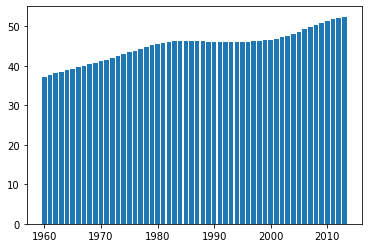

In [22]:
Years3 = stage3['Year'].values # Obtaining the years
life_1 = stage3['Value'].values # values of life expectancy

plt.bar(Years3,life_1)
plt.show()

Mortality rate seem to be improving especially from the mid 2000s onwards - A a more readable graph will suffice as shown below.

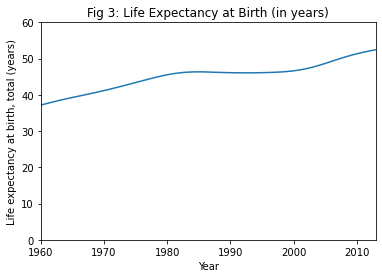

In [23]:
plt.plot(stage3['Year'].values, stage3['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage3['IndicatorName'].iloc[0])

#label the figure
plt.title('Fig 3: Life Expectancy at Birth (in years)')

# to make more honest, start they y axis at 0
plt.axis([1960, 2013,0,60])


plt.show()

### Indicator 4: Real Per Capita Income in Nigeria  


In [24]:
# Real Per Capita Income (2005 constant prices)

gdpc = 'GDP per capita \(constant 2005'
CO2_country = 'NGA'

mask7= dataset['IndicatorName'].str.contains(gdpc) 
mask8 = dataset['CountryCode'].str.contains(CO2_country)

stage4 = dataset[mask7 & mask8] # stage2 matches Nigeria with country code, Life expectancy (1960 - 2013)

In [25]:
stage4.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16671,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,559.194584
42298,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,548.944501
70224,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,559.658099
98788,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,594.909205
127719,Nigeria,NGA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,611.136904


In [26]:
stage4['Value'].describe()

count      55.000000
mean      694.066380
std       170.509273
min       468.102249
25%       558.287135
50%       611.985719
75%       817.390862
max      1098.040084
Name: Value, dtype: float64

The average income per-capita in Nigeria between 1960 - 2013 is reported as 694USD.
- While the maximum income is 1098USD, the lowest being 468.
- A median income per person is foind to be 612USD - a value less than the average income.

**How does the Nigerian income per capita vary over time ?** 

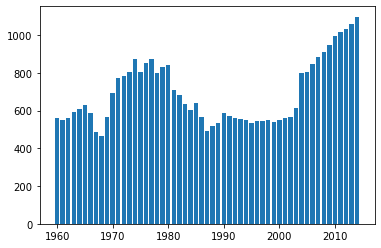

In [27]:
Years4 = stage4['Year'].values # Obtaining the years
gdpc_1 = stage4['Value'].values # values of life expectancy

plt.bar(Years4,gdpc_1)
plt.show()

Graphic here may imply that while income per capita between 1990 - 2004 show a marginal increase, there seem to be a gradual rise in income from the year 2005 upwards. A proper refelction on this can be gleaned through a line plot as presented below.

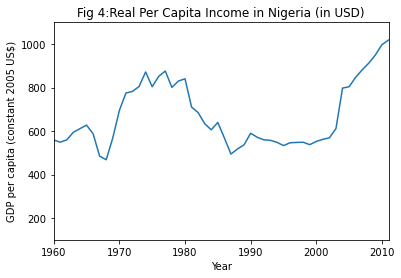

In [28]:
plt.plot(stage4['Year'].values, stage4['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage4['IndicatorName'].iloc[0])

#label the figure
plt.title('Fig 4:Real Per Capita Income in Nigeria (in USD)')

# to make more honest, start the y axis at 0
plt.axis([1960, 2011, 100, 1100])


plt.show()

**- Having explored the indicators of interest to this analysis, how do each indicator relate to each other? Does the source of CO2 emission really matter? This will be th basis of secion 2.**

### Indicator 5: Environmental Degradation (Per-capita CO2 Emissions in Metric tonnes ) for Nigeria


In [29]:
# select CO2 emissions for the United States
Co2_pc = 'CO2 emissions \(metric'
CO2_country = 'NGA'

mask9 = dataset['IndicatorName'].str.contains(Co2_pc) 
mask10 = dataset['CountryCode'].str.contains(CO2_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage5 = dataset[mask9 & mask10]

In [30]:
stage5.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
16647,Nigeria,NGA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.075349
42273,Nigeria,NGA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.089163
70195,Nigeria,NGA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.088722
98758,Nigeria,NGA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.111164
127689,Nigeria,NGA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.147963


In [31]:
stage5['Value'].describe()

count    52.000000
mean      0.557532
std       0.258980
min       0.075349
25%       0.360869
50%       0.628863
75%       0.750404
max       1.007021
Name: Value, dtype: float64

- The per capita CO2 emission between 1960 to 2011 is 0.557 metric tons per. 
- The minimun and maximum values are 0.08 and 1 metric tons per capita respectively.

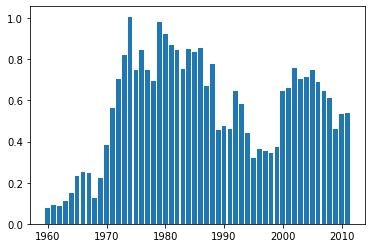

In [32]:
Years5 = stage5['Year'].values # Obtaining the years
co2_pc1 = stage5['Value'].values # values of life expectancy

plt.bar(Years5,co2_pc1)
plt.show()

In [33]:
- The figure above seem to pp

SyntaxError: invalid syntax (<ipython-input-33-ab63f34e9d5c>, line 1)

(1960.0, 2011.0, 0.0, 1.0)

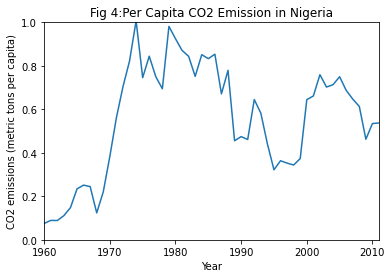

In [34]:
plt.plot(stage5['Year'].values, stage5['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage5['IndicatorName'].iloc[0])

#label the figure
plt.title('Fig 4:Per Capita CO2 Emission in Nigeria')

# to make more honest, start the y axis at 0
plt.axis([1960, 2011, 0, 1])



# Section 2: Data Analysis - More Data Visualization and Correlation 

### What is the relationship between Life expectancy at birth, total (years) and (CO2 emissions from liquid fuel consumption (% of Total )

In [35]:
print("Life_exp Min Year = ", stage3['Year'].min(), "max: ", stage3['Year'].max())
print("CO2_liquid Min Year = ", stage1['Year'].min(), "max: ", stage1['Year'].max())

Life_exp Min Year =  1960 max:  2013
CO2_liquid Min Year =  1960 max:  2011


- An extra 3 years of life expectancy variable was observed - It is imporant to restrict both variables to the same year.

In [36]:
stage3_life = stage3[stage3['Year'] < 2012]
print(len(stage3_life))
print(len(stage1))

52
52


-- Both variables now have the same number of years - good!

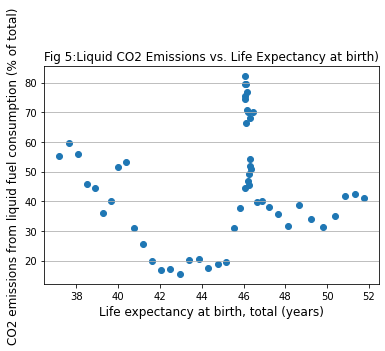

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Fig 5:Liquid CO2 Emissions vs. Life Expectancy at birth)',fontsize=12)
axis.set_xlabel(stage3_life['IndicatorName'].iloc[0],fontsize=12)
axis.set_ylabel(stage1['IndicatorName'].iloc[0],fontsize=12)

X = stage3_life['Value']
Y = stage1['Value']

axis.scatter(X, Y)
plt.show()

- The scatter plot shown in Figure 5 above is indicative that CO2 emission from liquid sources may weakly correlated with life expectancy in Nigeria. 
- This implies there is discernable pattern in the nature of such relationship. 
- Perhaps, it may be relevant to explore this further using the correlations tests.

In [38]:
np.corrcoef(stage3_life['Value'],stage1['Value'])

array([[1.      , 0.086301],
       [0.086301, 1.      ]])

- The correlation coefficient of 0.09 shows that CO2 emission from liquid sources and life expectancy is positively correlated-though a weak one.
- The result of the correlation test displayed above indeed confirms a very weak correlationship between CO2 emission from liquid sources and life expectancy in Nigeria.

### What is the relationship between Life expectancy at birth, total (years) and (CO2 emissions from gaseous fuel consumption (% of Total )

In [39]:
print("Life_exp1 Min Year = ", stage3['Year'].min(), "max: ", stage3['Year'].max())
print("CO2_gaseous Min Year = ", stage2['Year'].min(), "max: ", stage2['Year'].max())

Life_exp1 Min Year =  1960 max:  2013
CO2_gaseous Min Year =  1960 max:  2011


In [40]:
stage3_life = stage3[stage3['Year'] < 2012]
print(len(stage3_life))
print(len(stage2))

52
52


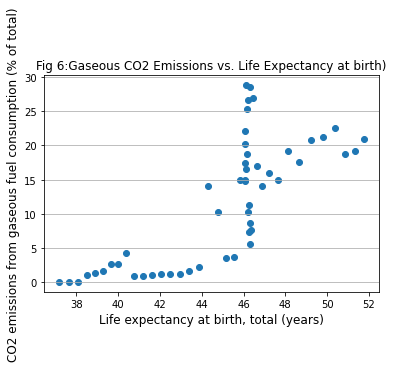

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Fig 6:Gaseous CO2 Emissions vs. Life Expectancy at birth)',fontsize=12)
axis.set_xlabel(stage3_life['IndicatorName'].iloc[0],fontsize=12)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=12)

X = stage3_life['Value']
Y = stage2['Value']

axis.scatter(X, Y)

- The scatter plot shown depicts a high correlation between CO2 emission from gaseous sources and life expectancy in Nigeria. 

In [42]:
np.corrcoef(stage3_life['Value'],stage2['Value'])

array([[1.        , 0.76503286],
       [0.76503286, 1.        ]])

- The correlation coefficient between CO2 emission form gaseous sources and life expectancy is 0.76 and close to 1
- This correlation coefficient is also positive.
- This implies a high and positive correlation between both indicators.
- We can infer that as environmental degradation through CO2 emission from gaseous sources increases, life expectancy also improves.
- The result seem to be be more related to the level of emission. 
- It is documented that low income countries with low CO2 emissions are more likely to experiencing higher incidences of life expectancy.

### What is the relationship between life expectancy and CO2 emissions per capita (in metric ton )¶

In [43]:
print("Life_exp1 Min Year = ", stage3['Year'].min(), "max: ", stage3['Year'].max())
print("CO2_pcc Min Year = ", stage5['Year'].min(), "max: ", stage5['Year'].max())

Life_exp1 Min Year =  1960 max:  2013
CO2_pcc Min Year =  1960 max:  2011


In [44]:
stage3_life = stage3[stage3['Year'] < 2012]
print(len(stage3_life))
print(len(stage5))

52
52


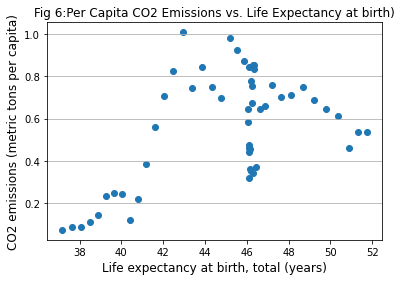

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Fig 6:Per Capita CO2 Emissions vs. Life Expectancy at birth)',fontsize=12)
axis.set_xlabel(stage3_life['IndicatorName'].iloc[0],fontsize=12)
axis.set_ylabel(stage5['IndicatorName'].iloc[0],fontsize=12)

X = stage3_life['Value']
Y = stage5['Value']

axis.scatter(X, Y)

In [46]:
np.corrcoef(stage3_life['Value'],stage5['Value'])

array([[1.        , 0.54124906],
       [0.54124906, 1.        ]])

### Again - there seem to be a positive correlation between life expectancy and Per-capita CO2 Emission.

### What is the relationship between GDP per capita and CO2 emissions from liquid sources?

In [47]:
print("gdppc Min Year = ", stage4['Year'].min(), "max: ", stage4['Year'].max())
print("CO2_l1 Min Year = ", stage1['Year'].min(), "max: ", stage1['Year'].max())

gdppc Min Year =  1960 max:  2014
CO2_l1 Min Year =  1960 max:  2011


In [48]:
stage4_gp = stage4[stage4['Year'] < 2012]
print(len(stage4_gp))
print(len(stage1))

52
52


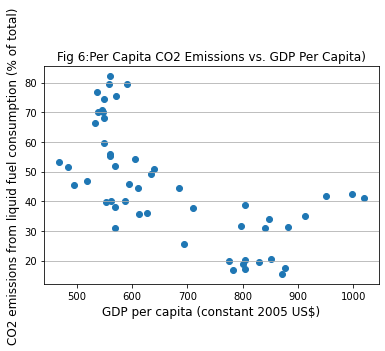

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Fig 6:Per Capita CO2 Emissions vs. GDP Per Capita)',fontsize=12)
axis.set_xlabel(stage4_gp['IndicatorName'].iloc[0],fontsize=12)
axis.set_ylabel(stage1['IndicatorName'].iloc[0],fontsize=12)

X = stage4_gp['Value']
Y = stage1['Value']

axis.scatter(X, Y)

In [50]:
np.corrcoef(stage4_gp['Value'],stage1['Value'])

array([[ 1.        , -0.64969583],
       [-0.64969583,  1.        ]])

### Sumamry: CO2 Emissions from liquid fuel versus real income per capita
1. The scatter plot shown is indicative that CO2 emission from liquid sources is negatively correlated with GDO per capita in Nigeria.
2. The Correlation coefficient is negative ( 0.65)
3. Implies an inverse correlationship between CO2 emission from liquid fuel consumption and GDP per capita.
#### Thus, environmental degradation from liquid sources may rather translate to lower level of income in Nigeria.

### What is the relationship between GDP per capita and CO2 emissions from gaseous sources?

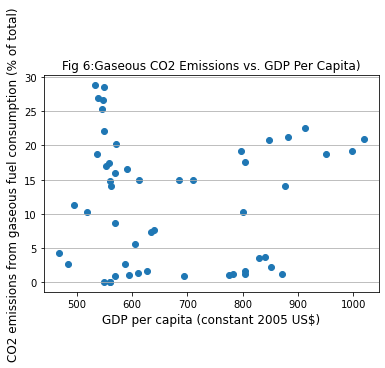

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Fig 6:Gaseous CO2 Emissions vs. GDP Per Capita)',fontsize=12)
axis.set_xlabel(stage4_gp['IndicatorName'].iloc[0],fontsize=12)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=12)

X = stage4_gp['Value']
Y = stage2['Value']

axis.scatter(X, Y)

In [52]:
np.corrcoef(stage4_gp['Value'],stage2['Value'])

array([[1.        , 0.00923276],
       [0.00923276, 1.        ]])

### Summary: CO2 Emissions from gaseous fuel versus real income per capita
1. The scatter plot shown show no clear pattern of relationship between CO2 emission from gaseous sources GDP per capita in Nigeria.
2. The Correlation coefficient is very low and positive (
3. There is therefore no discernable relationship between both indicators.

### What is the relationship between GDP per capita and CO2 emissions Per Capita?

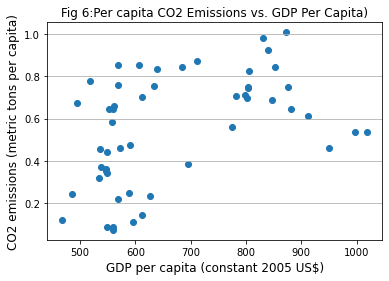

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Fig 6:Per capita CO2 Emissions vs. GDP Per Capita)',fontsize=12)
axis.set_xlabel(stage4_gp['IndicatorName'].iloc[0],fontsize=12)
axis.set_ylabel(stage5['IndicatorName'].iloc[0],fontsize=12)

X = stage4_gp['Value']
Y = stage5['Value']

axis.scatter(X, Y)

In [54]:
np.corrcoef(stage4_gp['Value'],stage5['Value'])

array([[1.        , 0.46453835],
       [0.46453835, 1.        ]])

### Summary: CO2 Emissions per capita (in metric ton) versus real income per capita

1. The scatter plot shown depicts some correlation between per capita CO2 emission and real GDP per capita in Nigeria.

2. Finding show a positive correlation coefficient of 0.464.
3. This implies that as environmental degradation through per capita CO2 emission indeed translated to income per capita in Nigeria.

#### This alludes to a scenario such that environmental degrading elements of economic growth processes also raises income per capita (Nwaka et al 2020).